# MarkMark 

In [1]:
import lltk
import plotnine as p9

In [2]:
# load corpus
C=lltk.load('MarkMark')

In [3]:
# get some basic info
C.info()

[MarkMark]
id: markmark
desc: Mark Algee-Hewitt's and Mark McGurl's 20th Century Corpus
link: --
downloadable: metadata,freqs,txt


## Install

### From pre-compiled zips

Only metadata and 1-gram counts are made available via download.

In [4]:
C.download(parts=['metadata','freqs','txt'], force=False)  # change force to True to redownload

### Compile from sources

Compile metadata and 1-gram counts from ARTFL website. Does not work unless you have institutional access to ARTFL.

In [5]:
# C.compile(force=False)  # set force to True to overwrite existing meta/data

## Metadata

In [6]:
# C.fix_metadata()

In [7]:
C.metadata

,id,author,title,year,author_id,dob,dod,gender,genre,genre_confirmed,name_first,name_last,name_middle,name_title,nation,notes,num_words,ocr_accuracy,source,corpus
0,"Caldwell,_Erskine.Tobacco_Road","Caldwell, Erskine",Tobacco Road,1932,,1903,1987,M,Fiction,,Erskine,Caldwell,,,American,,69662,0.818840,,MarkMark
1,"Sinclair,_Upton.The_Jungle","Sinclair, Upton",The Jungle,1906,,1878,1968,M,Fiction,,Upton,Sinclair,Beall,,American,,156031,0.822785,,MarkMark
2,"Hemingway,_Ernest.In_Our_Time","Hemingway, Ernest Miller",In Our Time,1925,,1899,1961,M,Fiction,,Ernest,Hemingway,Miller,,American,,43243,0.812039,,MarkMark
3,"Hemingway,_Ernest.A_Farewell_to_Arms","Hemingway, Ernest Miller",A Farewell to Arms,1929,,1899,1961,M,Fiction,,Ernest,Hemingway,Miller,,American,,103460,0.746056,,MarkMark
4,"Hemingway,_Ernest.For_Whom_the_Bell_Tolls","Hemingway, Ernest Miller",For Whom the Bell Tolls,1940,,1899,1961,M,Fiction,,Ernest,Hemingway,Miller,,American,,191216,0.769099,,MarkMark
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,"Sukenick,_Ronald.Up","Sukenick, Ronald",Up,1968,,1932,2004,M,Fiction,,Ronald,Sukenick,,,American,,114213,0.777302,,MarkMark
351,"Bennett,_Arnold.The_Old_Wives'_Tale","Bennett, Enoch Arnold",The Old Wives' Tale,1908,,1867,1931,M,Fiction,,Enoch,Bennett,Arnold,,English,,222095,0.782219,,MarkMark
352,"Robbins,_Tom.Skinny_Legs_and_All","Robbins, Tom",Skinny Legs and All,1990,,1936,,M,Fiction,,Tom,Robbins,,,American,,179211,0.795755,,MarkMark
353,"Donleavy,_J.P..The_Ginger_Man","Donleavy, James Patrick",The Ginger Man,1955,,1926,,M,Fiction,,James,Donleavy,Patrick,,Irish American,,116047,0.780417,,MarkMark


In [8]:
# Min to max years
C.metadata.year.min(), C.metadata.year.max()

(1881, 2011)

In [9]:
# Distribution of texts by year
# C.plot_distro('year')

## Preprocess

### Most Frequent Words (MFW)

In [27]:
# Set the yearbin for this corpus
C.mfw_yearbin = 25

In [28]:
# Make it permanent: edit ~/lltk_data/manifest.txt
# and add:
#
# [MarkMark]
# mfw_yearbin = 25

In [29]:
# Pre-compute the most frequent words for texts grouped in that yearbin
C.preprocess_mfw(num_proc=4)

Counting most frequent words across groups [x4]: 100%|██████████| 6/6 [00:02<00:00,  2.45it/s]


In [30]:
# Top 100 words overall, as determined by `n_agg` function over `valtype`
# Then a row for each of these 100 words in each period (`keep_periods` == True) if it's in there 
C.mfw_df(n=100,keep_periods=True)

,period,word,count,fpm,rank
0,1875-1900,the,25166,46085.413489,1
1,1875-1900,to,16643,30477.610136,2
2,1875-1900,of,16187,29642.556948,3
3,1875-1900,and,13254,24271.480187,4
4,1875-1900,a,13208,24187.242365,5
...,...,...,...,...,...
593,2000-2025,any,1276,892.975863,123
594,2000-2025,well,1103,771.906252,142
595,2000-2025,little,1046,732.016264,152
596,2000-2025,old,1009,706.122763,156


In [31]:
# Use different periods on the fly
C.mfw_df(n=100,keep_periods=True,yearbin=10)

Counting most frequent words across groups [x1]: 100%|██████████| 14/14 [00:07<00:00,  1.98it/s]


,period,word,count,fpm,rank
0,1880-1890,the,15422,38792.897444,1
1,1880-1890,to,13135,33040.118527,2
2,1880-1890,of,11297,28416.765816,3
3,1880-1890,a,9287,23360.759860,4
4,1880-1890,she,9127,22958.291724,5
...,...,...,...,...,...
1389,2010-2020,than,192,698.890875,171
1390,2010-2020,come,189,687.970705,175
1391,2010-2020,little,169,615.169572,190
1392,2010-2020,man,168,611.529515,191


In [13]:
# Top 100 words overall, as determined by `n_agg` function over `valtype`
# These scores returned (`keep_periods` == False)
C.mfw_df(n=100,keep_periods=False)

,word,count,fpm,rank,ranks_avg
0,the,1396360.5,54565.767569,1,1.0
1,and,753210.0,28101.026096,2,2.0
2,to,641985.5,24515.540439,3,3.0
3,a,580667.0,23174.124448,4,4.5
4,of,610674.5,21474.916204,5,4.5
...,...,...,...,...,...
95,never,31845.0,1115.928108,96,97.5
96,way,32480.5,1100.102274,97,102.5
97,again,29360.0,1098.796909,98,102.0
98,than,30507.0,1082.676857,99,103.5


In [14]:
# Get value for a word over time
C.mfw_df(keep_periods=True).query('word == "isabel"')

,period,word,count,fpm,rank
1687,1800-2000,isabel,2333,46.717811,1688
33276,2000-2200,isabel,9,6.298419,8881


In [15]:
# Change yearbin if you want
C.mfw_df(yearbin=100, keep_periods=True).query('word == "isabel"')

,period,word,count,fpm,rank
49,1800-1900,isabel,1477,2704.766579,50
19522,1900-2000,isabel,856,17.330723,4098
48803,2000-2100,isabel,9,6.298419,8881


In [16]:
# Get all words and their counts for whole corpus
C.mfw_df(yearbin=False, n=None, keep_periods=True)

,period,word,count,fpm,z,rank
0,all,the,2792721,54367.938580,424.329577,1
1,all,and,1506420,29326.577927,228.880193,2
2,all,to,1283971,24996.000842,195.079768,3
3,all,of,1221349,23776.892649,185.564553,4
4,all,a,1161334,22608.536829,176.445462,5
...,...,...,...,...,...,...
500966,all,boot-buckles,1,0.019468,-0.015428,500967
500967,all,door—forever,1,0.019468,-0.015428,500968
500968,all,engin-dear,1,0.019468,-0.015428,500969
500969,all,hijackings,1,0.019468,-0.015428,500970


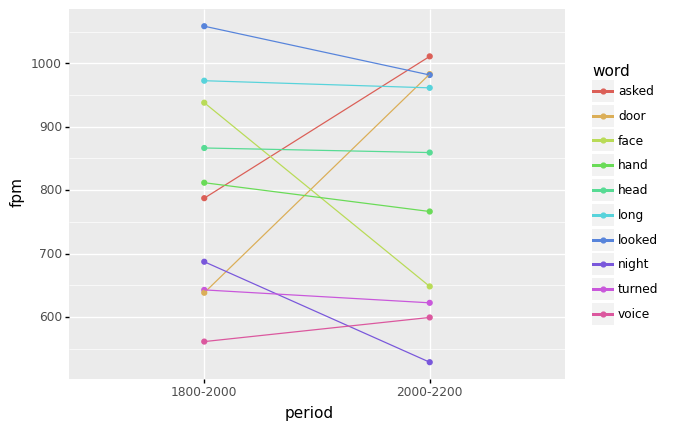

<ggplot: (8735017848421)>

In [17]:
# plot overall top 10 words over the separate periods, where a period is a decade
fig=p9.ggplot(
    p9.aes(x='period',y='fpm',color='word'),
    data=C.mfw_df(n=10, keep_periods=True, excl_stopwords=True, excl_top=100)
)
fig+=p9.geom_point()
fig+=p9.geom_line(p9.aes(group='word'))
fig

### Document-Term Matrix (DTM)

In [18]:
# Build a document term matrix with the top n words (defaults to 25000)
C.preprocess_dtm(num_proc=4)

Gathering frequencies [x4]: 100%|██████████| 355/355 [00:01<00:00, 188.48it/s]


In [19]:
# Load dtm with top n words (defaults to 25000)
C.dtm()

,raw,was,from,they,his,s,as,a,how,this,...,eighteen-wheeler,benignly,procure,immersion,bagged,swatted,gelato,obstruction,three-year,programmes
id,,,,,,,,,,,,,,,,,,,,,
"Caldwell,_Erskine.Tobacco_Road",60890,3447,1896,2231,1112,1029,1234,966,877,936,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Sinclair,_Upton.The_Jungle",150771,8927,7275,4185,4358,4154,3321,607,2510,3055,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Hemingway,_Ernest.In_Our_Time",38643,3118,1346,802,741,823,1054,425,663,652,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Hemingway,_Ernest.A_Farewell_to_Arms",90924,6198,3166,1899,1130,1821,912,3859,1343,1447,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Hemingway,_Ernest.For_Whom_the_Bell_Tolls",175448,11260,6456,3551,3666,2792,3926,2927,2421,2287,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Sukenick,_Ronald.Up",102946,4350,1968,2437,2172,2965,1395,3306,1430,963,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Bennett,_Arnold.The_Old_Wives'_Tale",217285,12775,6690,5605,6618,5162,2947,1927,3893,4397,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Robbins,_Tom.Skinny_Legs_and_All",153875,8677,3713,3799,3909,3871,1341,1147,2637,2240,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
# !rm -r /home/ryan/lltk_data/corpora/artfl/data

In [21]:
C.dtm(tf=True)

,raw,was,from,they,his,s,as,a,how,this,...,eighteen-wheeler,benignly,procure,immersion,bagged,swatted,gelato,obstruction,three-year,programmes
id,,,,,,,,,,,,,,,,,,,,,
"Caldwell,_Erskine.Tobacco_Road",0.001185,0.001234,0.001259,0.001738,0.000910,0.000886,0.001392,0.001183,0.001095,0.001300,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Sinclair,_Upton.The_Jungle",0.002935,0.003197,0.004829,0.003259,0.003568,0.003577,0.003747,0.000743,0.003134,0.004242,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Hemingway,_Ernest.In_Our_Time",0.000752,0.001116,0.000894,0.000625,0.000607,0.000709,0.001189,0.000520,0.000828,0.000905,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Hemingway,_Ernest.A_Farewell_to_Arms",0.001770,0.002219,0.002102,0.001479,0.000925,0.001568,0.001029,0.004725,0.001677,0.002009,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Hemingway,_Ernest.For_Whom_the_Bell_Tolls",0.003416,0.004032,0.004286,0.002766,0.003002,0.002404,0.004430,0.003584,0.003023,0.003176,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Sukenick,_Ronald.Up",0.002004,0.001558,0.001306,0.001898,0.001778,0.002553,0.001574,0.004048,0.001786,0.001337,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Bennett,_Arnold.The_Old_Wives'_Tale",0.004230,0.004574,0.004441,0.004365,0.005419,0.004445,0.003325,0.002359,0.004861,0.006106,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Robbins,_Tom.Skinny_Legs_and_All",0.002996,0.003107,0.002465,0.002959,0.003201,0.003333,0.001513,0.001404,0.003293,0.003111,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
dtm_tfidf = C.dtm(tf=True)
dtm_tfidf

,raw,was,from,they,his,s,as,a,how,this,...,eighteen-wheeler,benignly,procure,immersion,bagged,swatted,gelato,obstruction,three-year,programmes
id,,,,,,,,,,,,,,,,,,,,,
"Caldwell,_Erskine.Tobacco_Road",0.001185,0.001234,0.001259,0.001738,0.000910,0.000886,0.001392,0.001183,0.001095,0.001300,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Sinclair,_Upton.The_Jungle",0.002935,0.003197,0.004829,0.003259,0.003568,0.003577,0.003747,0.000743,0.003134,0.004242,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Hemingway,_Ernest.In_Our_Time",0.000752,0.001116,0.000894,0.000625,0.000607,0.000709,0.001189,0.000520,0.000828,0.000905,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Hemingway,_Ernest.A_Farewell_to_Arms",0.001770,0.002219,0.002102,0.001479,0.000925,0.001568,0.001029,0.004725,0.001677,0.002009,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Hemingway,_Ernest.For_Whom_the_Bell_Tolls",0.003416,0.004032,0.004286,0.002766,0.003002,0.002404,0.004430,0.003584,0.003023,0.003176,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Sukenick,_Ronald.Up",0.002004,0.001558,0.001306,0.001898,0.001778,0.002553,0.001574,0.004048,0.001786,0.001337,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Bennett,_Arnold.The_Old_Wives'_Tale",0.004230,0.004574,0.004441,0.004365,0.005419,0.004445,0.003325,0.002359,0.004861,0.006106,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Robbins,_Tom.Skinny_Legs_and_All",0.002996,0.003107,0.002465,0.002959,0.003201,0.003333,0.001513,0.001404,0.003293,0.003111,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
dtm_tfidf.loc['Hemingway,_Ernest.A_Farewell_to_Arms'].sort_values(ascending=False).head(25)

diego          0.735849
ibook          0.478049
yours.         0.436364
creaked        0.313433
bed.           0.208333
el-ahrairah    0.200000
lourdes        0.196146
surfaced       0.166667
cables         0.156863
dove           0.144330
poland         0.108247
suing          0.108108
freytag        0.107143
long-term      0.105263
warily         0.096886
lagrange       0.090909
fazal          0.089552
varied         0.086022
telegraph      0.085714
torsten        0.078740
splash         0.076923
twitch         0.076923
morgoth        0.075472
clint          0.073913
deserves       0.073171
Name: Hemingway,_Ernest.A_Farewell_to_Arms, dtype: float64